##  How to import the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from IPython.display import display
from scripts.random_profiles import RandomProfileGenerator
from scripts.profile_reader2 import ProfileReader
pd.options.display.max_rows = 30
pd.options.display.max_columns = 300
%matplotlib inline

# ensure reprodicible results
np.random.seed(42) 

pr = ProfileReader(data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',  
                       mechanism_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')



# read in data.
data = pr.get_profile(index=['mech'])

## How to define mechanism class

In [3]:
mech = 'HDAC inhibitor'

## How to get positve and negative class

In [3]:
pos_class = pr.get_pos_class(mech)
neg_class = pr.get_neg_class(pos_class)

## How to get X and y values for training

In [4]:
X, y = pr.get_x_y(mech=mech)

## How to get X and y values for training with imputation

In [15]:
X, y = pr.get_x_y(mech=mech, impute='group_mean')

## How to get X and y values for training with imputation and Normalization

In [6]:
X, y = pr.get_x_y(mech=mech, impute='group_mean', normalize='l1')

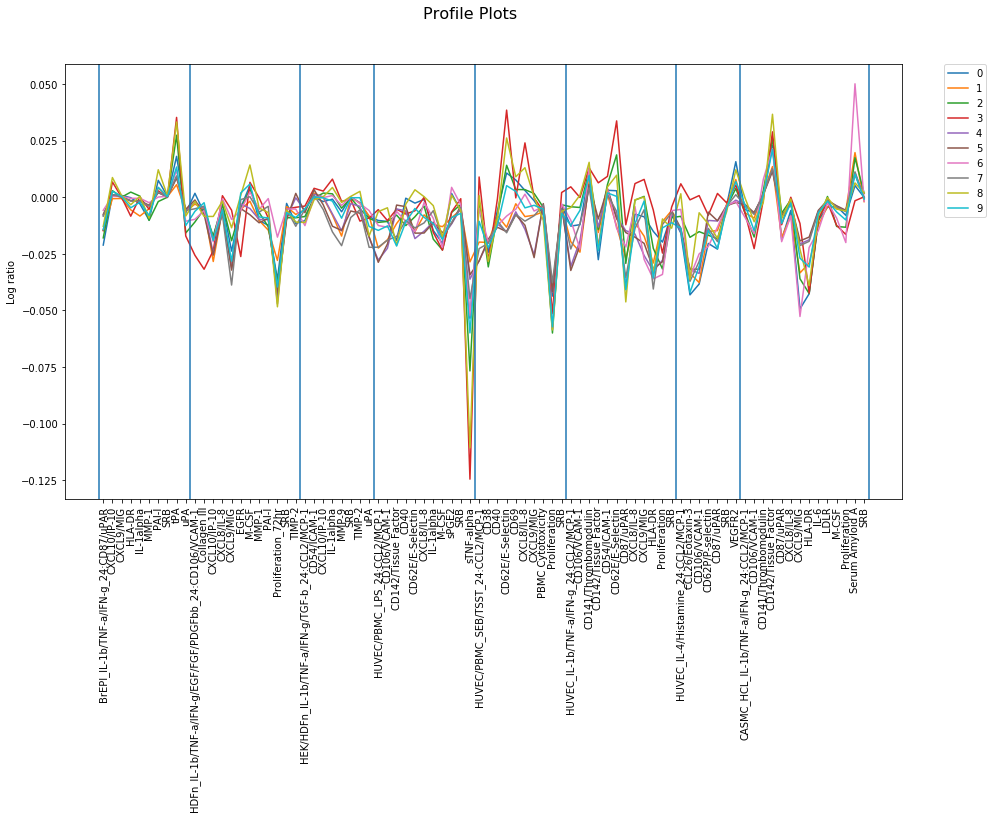

In [14]:
pr.plot(X.iloc[:10,:])

## How to plot all profiles

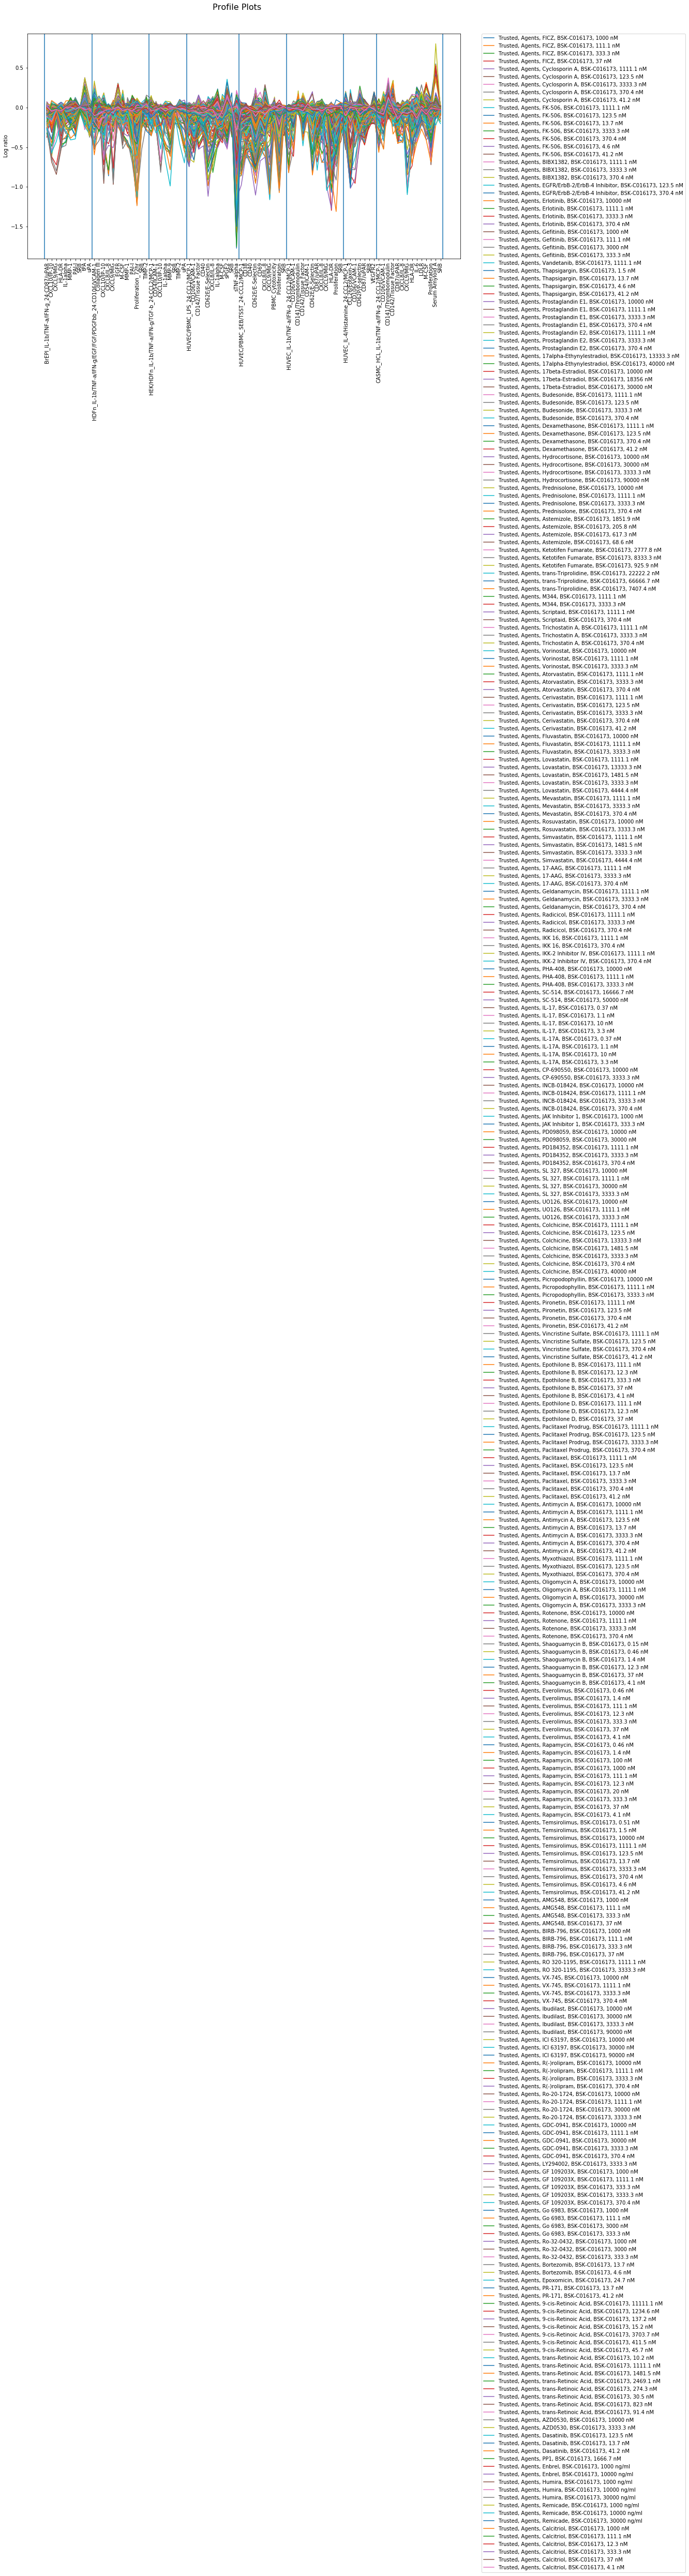

In [11]:
pr.plot(index='prof')

## How to plot positive class

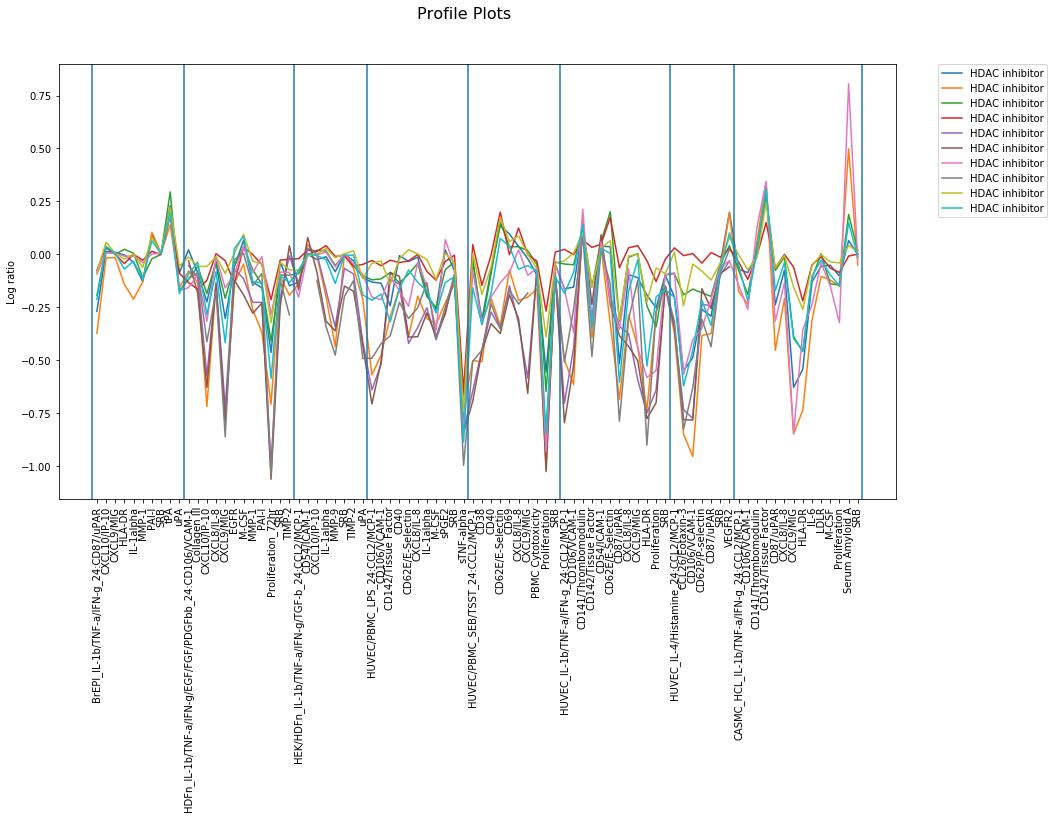

In [12]:
pr.plot(data=pos_class, index='prof')

## How to plot mean mechanism class

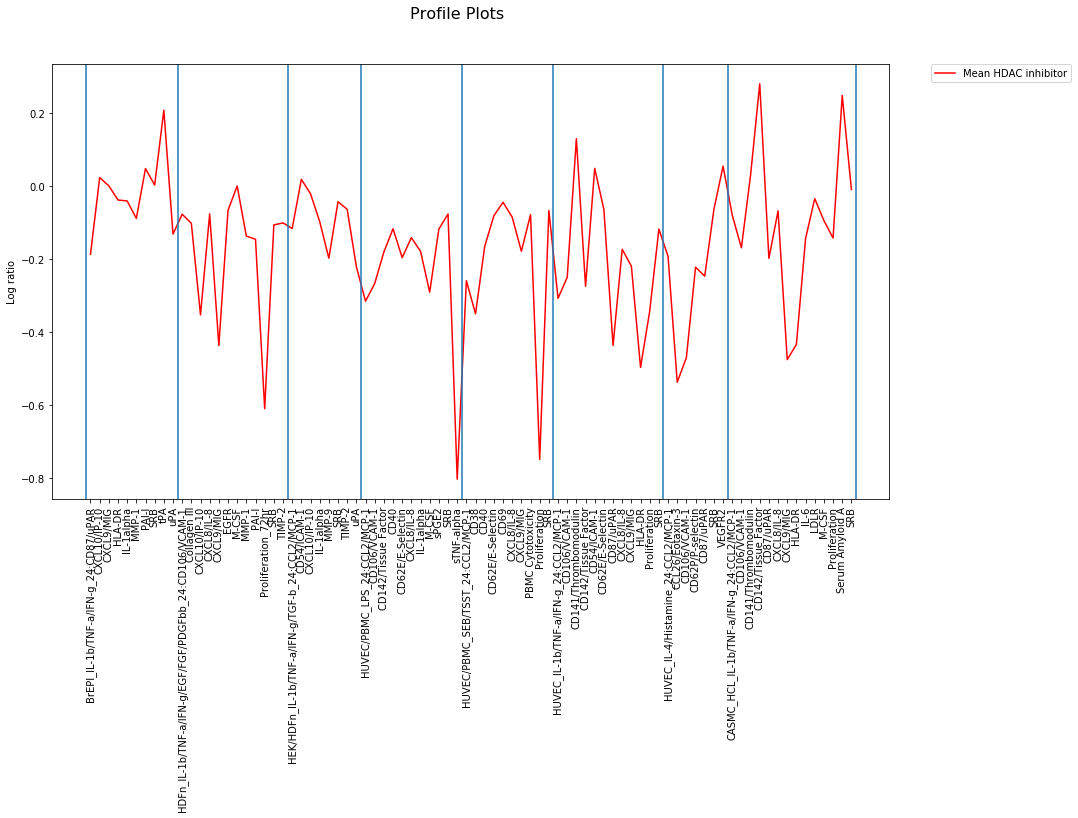

In [9]:
mm = pd.DataFrame(pos_class.mean(axis=0)).T
mm.index = ['Mean ' + mech]
pr.plot(data=mm, color='red')

## How to plot an agent only

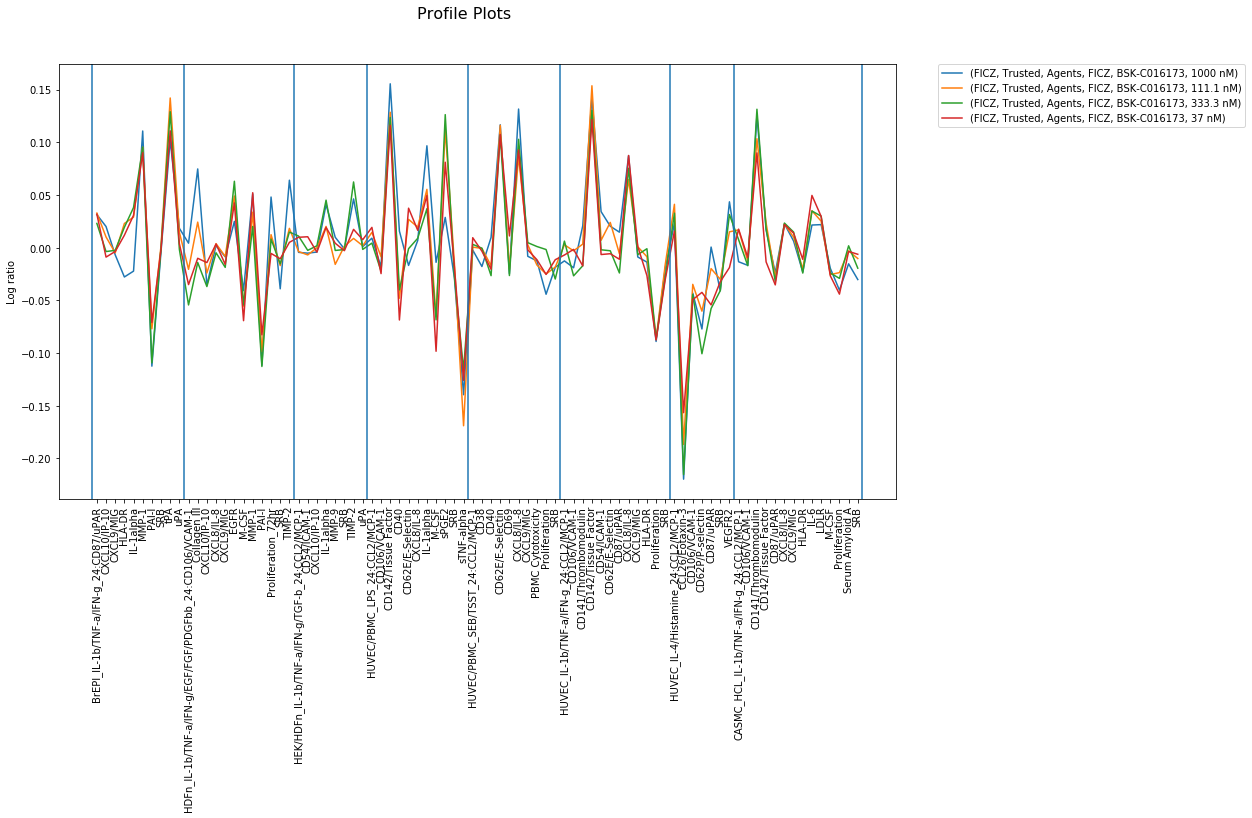

In [16]:
pr.plot(agents=['FICZ'], index=['agent', 'prof'])

## How to overlay an agent with a mean mechanism

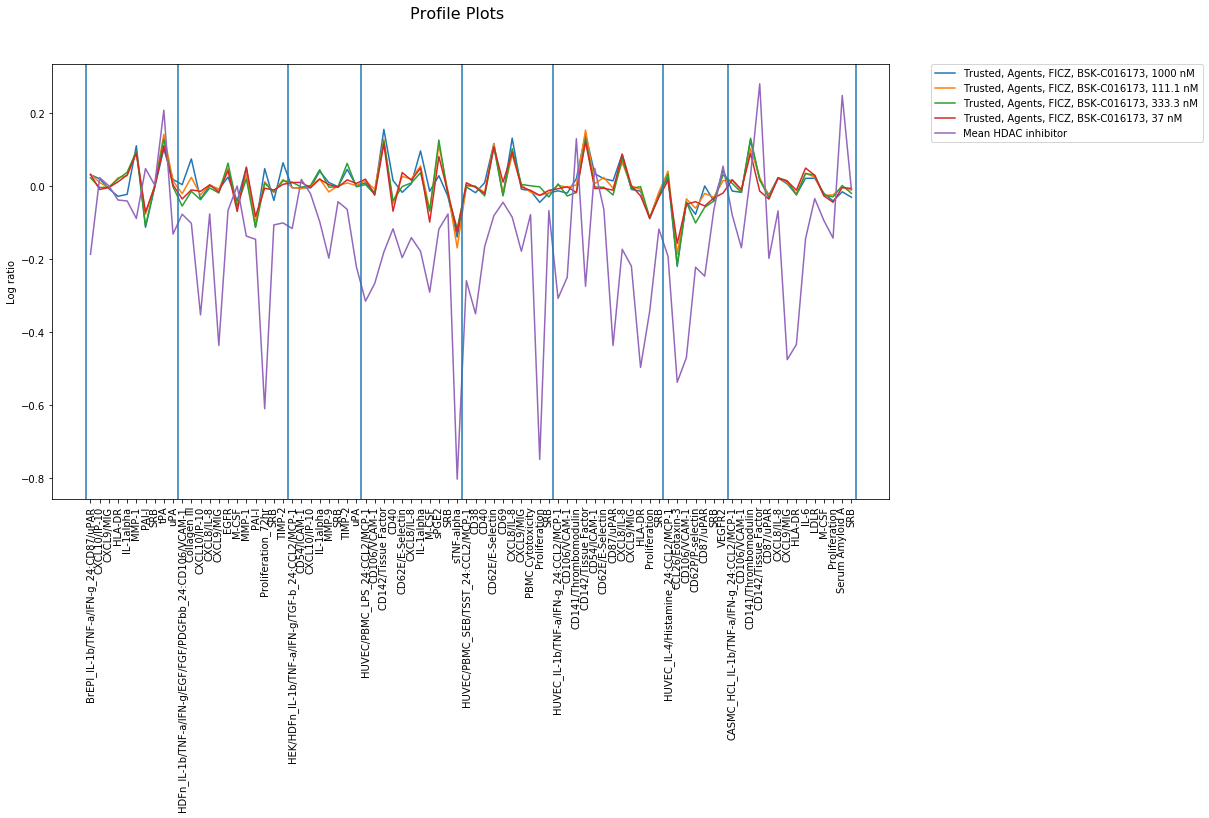

In [26]:
agent_name = 'FICZ'
ag = pr.get_profile(index=['agent', 'prof'])
ag = ag.loc[agent_name]
ovrly = pd.concat([ag, mm])
pr.plot(data=ovrly)